In [1]:
pip install --upgrade torch torchvision

Requirement already up-to-date: torch in /opt/conda/lib/python3.6/site-packages (1.8.1)
Requirement already up-to-date: torchvision in /opt/conda/lib/python3.6/site-packages (0.9.1)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
print(torch.__version__)
torch.manual_seed(42)

1.8.1+cu102


In [3]:
import pandas as pd
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
dir="apple_plant/"
os.chdir(dir)
test_file = pd.read_csv("test.csv")
train_file = pd.read_csv("train.csv")

In [5]:
class_names = train_file.loc[ : ,'healthy':].columns 
class_names

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')

In [6]:
number= 0
train_file['label']= 0
for i in class_names:
    train_file['label']= train_file['label'] + train_file[i] * number
    number=number+1

In [7]:
train_file.head()

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [8]:
#os.mkdir("train")

In [9]:
#for i in class_names:  
#  os.mkdir("train"+"/"+str(i))

In [10]:
#for rows,columns in tqdm(train_file.iterrows()):
#  src_dir = "images"+"/"+str(columns.image_id)+".jpg"
#  if columns.label == 3:
#    dst_dir = "train/"+str(class_names[3])+"/"+str(columns.image_id)+'.jpg'
#    shutil.copy(src_dir, dst_dir)
#  elif columns.label == 2:
#    dst_dir = "train/"+str(class_names[2])+"/"+str(columns.image_id)+'.jpg'
#    shutil.copy(src_dir, dst_dir)
#  elif columns.label == 1:
#    dst_dir = "train/"+str(class_names[1])+"/"+str(columns.image_id)+'.jpg'
#    shutil.copy(src_dir, dst_dir)
#  elif columns.label == 0:
#    dst_dir = "train/"+str(class_names[0])+"/"+str(columns.image_id)+'.jpg'
#    shutil.copy(src_dir, dst_dir)

In [11]:
#os.mkdir("test")
#for i in class_names:  
#   os.mkdir("test"+"/"+str(i))

In [12]:
#for i in os.listdir('train'):
#  srca = 'train/'+str(i)
#  images = os.listdir(srca)
#  for j in tqdm(range(len(images) - int(len(images)*0.2),len(images))):
#    src = srca +"/"+ str(images[j]) 
#    des = 'test/'+str(i)+"/"+str(images[j])
#    shutil.move(src,des)

In [13]:
print(len(os.listdir("train/"+str(class_names[0]))) + len(os.listdir("test/"+str(class_names[0]))))
print(train_file[train_file.label == 0].shape[0])
print(len(os.listdir("train/"+str(class_names[1])))+len(os.listdir("test/"+str(class_names[1]))))
print(train_file[train_file.label == 1].shape[0])
print(len(os.listdir("train/"+str(class_names[2])))+len(os.listdir("test/"+str(class_names[2]))))
print(train_file[train_file.label == 2].shape[0])
print(len(os.listdir("train/"+str(class_names[3])))+len(os.listdir("test/"+str(class_names[3]))))
print(train_file[train_file.label == 3].shape[0])

516
516
91
91
622
622
592
592


In [14]:
import torch
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.transforms import ToTensor
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.transforms import Resize
import torchvision.transforms as tt

In [16]:
stats = ((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
train_tfms1 = tt.Compose([tt.CenterCrop(800), 
                         Resize((224,224)),
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(),
                         tt.Normalize(*stats,inplace=True)])
train_tfms2 = tt.Compose([tt.RandomCrop(896, padding=4, padding_mode='reflect'), 
                         Resize((224,224)),
                         tt.RandomVerticalFlip(), 
                         tt.ToTensor(),
                         tt.Normalize(*stats,inplace=True)])
train_tfms3 = tt.Compose([tt.RandomRotation(90,fill=0),
                         tt.CenterCrop(524), 
                         Resize((224,224)),
                         tt.ToTensor(),
                         tt.Normalize(*stats,inplace=True)])
train_tfms4 = tt.Compose([tt.RandomRotation(45,fill=0),
                         Resize((224,224)),
                         tt.RandomVerticalFlip(),
                         tt.ToTensor(),
                         tt.Normalize(*stats,inplace=True)])
train_tfms5 = tt.Compose([tt.ToTensor(), tt.Normalize(*stats),Resize((224,224))])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats),Resize((224,224))])

In [17]:
train_data1 = ImageFolder('train', train_tfms1)
train_data2 = ImageFolder('train', train_tfms2)
train_data3 = ImageFolder('train', train_tfms3)
train_data4 = ImageFolder('train', train_tfms4)
train_data5 = ImageFolder('train', train_tfms5)
val_data = ImageFolder('test', valid_tfms)

In [18]:
dataset = ImageFolder("train",transform=tt.Compose([ToTensor(),Resize((224,224))]))

In [19]:
train_data = torch.utils.data.ConcatDataset([dataset,train_data1,train_data2,train_data3,train_data4,train_data5])

In [20]:
val_data.classes

['healthy', 'multiple_diseases', 'rust', 'scab']

0


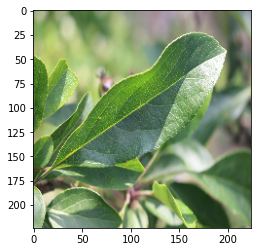

In [21]:
for image,label in train_data:
  print(label)
  plt.imshow(image.permute(1,2,0))
  plt.show()
  break

In [22]:
image,label = train_data[5000]
print(image.shape)
image,label = train_data[5]
print(image.shape)

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


In [23]:
batch_size = 16
train_ds = DataLoader(train_data, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_ds = DataLoader(val_data, batch_size*2,num_workers=4, pin_memory=True)

In [36]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=5).permute(1, 2, 0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


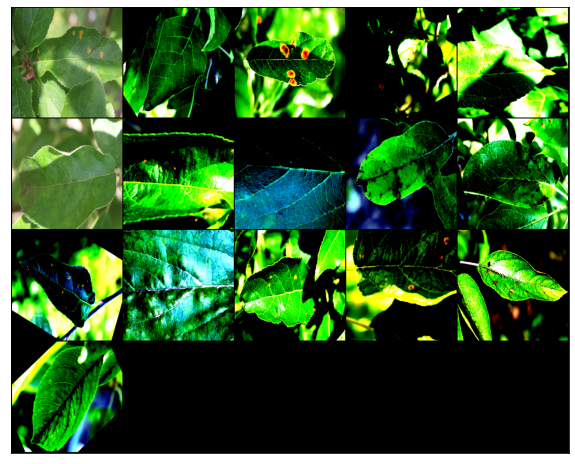

In [37]:
show_batch(train_ds)

In [38]:
import torch.nn as nn
import torch.nn.functional as F

In [39]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  
        loss = F.cross_entropy(out, labels) 
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                   
        loss = F.cross_entropy(out, labels)  
        acc = accuracy(out, labels)          
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [40]:
class Apple_plant(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 112 x 112

            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 56 x 56

            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x28x28 
            
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x14x14

            nn.Flatten(), 
            nn.Linear(128*14*14, 128*14),
            nn.ReLU(),
            nn.Linear(128*14, 128),
            nn.ReLU(),
            nn.Linear(128, 4))
        
    def forward(self, xb):
        return self.network(xb)

In [41]:
model = Apple_plant()
model

Apple_plant(
  (network): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=25088, out_features=1792, bias=True)
    (14): ReLU()
    (15): Linear(in_features=1792, out_features=128, bias=True)
    (16): ReLU()
    (17): Linear(in_features=128, out_features=4, bia

In [42]:
for images, labels in train_ds:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([16, 3, 224, 224])
out.shape: torch.Size([16, 4])
out[0]: tensor([-0.0540, -0.0124,  0.0794,  0.0758], grad_fn=<SelectBackward>)


In [43]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

In [44]:
device = get_default_device()
device

device(type='cuda')

In [45]:
data_train = DeviceDataLoader(train_ds, device)
data_val = DeviceDataLoader(val_ds, device)
to_device(model, device)

Apple_plant(
  (network): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=25088, out_features=1792, bias=True)
    (14): ReLU()
    (15): Linear(in_features=1792, out_features=128, bias=True)
    (16): ReLU()
    (17): Linear(in_features=128, out_features=4, bia

In [46]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [47]:
model = to_device(Apple_plant(), device)
model


Apple_plant(
  (network): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Flatten(start_dim=1, end_dim=-1)
    (13): Linear(in_features=25088, out_features=1792, bias=True)
    (14): ReLU()
    (15): Linear(in_features=1792, out_features=128, bias=True)
    (16): ReLU()
    (17): Linear(in_features=128, out_features=4, bia

In [48]:
evaluate(model, data_val)


{'val_loss': 1.3809432983398438, 'val_acc': 0.3619791567325592}

In [49]:
num_epochs = 30
opt_func = torch.optim.Adam
lr = 0.0001

In [50]:
perform = fit(num_epochs, lr, model, data_train, data_val, opt_func)

Epoch [0], train_loss: 1.1650, val_loss: 0.9413, val_acc: 0.6463
Epoch [1], train_loss: 0.7814, val_loss: 0.6244, val_acc: 0.7528
Epoch [2], train_loss: 0.6225, val_loss: 0.5901, val_acc: 0.7997
Epoch [3], train_loss: 0.5392, val_loss: 0.5457, val_acc: 0.8208
Epoch [4], train_loss: 0.4604, val_loss: 0.4202, val_acc: 0.8646
Epoch [5], train_loss: 0.3889, val_loss: 0.4564, val_acc: 0.8494
Epoch [6], train_loss: 0.3408, val_loss: 0.3637, val_acc: 0.8906
Epoch [7], train_loss: 0.3047, val_loss: 0.3444, val_acc: 0.8987
Epoch [8], train_loss: 0.2767, val_loss: 0.3468, val_acc: 0.9089
Epoch [9], train_loss: 0.2457, val_loss: 0.3474, val_acc: 0.9039
Epoch [10], train_loss: 0.2240, val_loss: 0.4037, val_acc: 0.8625
Epoch [11], train_loss: 0.2090, val_loss: 0.3855, val_acc: 0.8984
Epoch [12], train_loss: 0.2067, val_loss: 0.3419, val_acc: 0.8830
Epoch [13], train_loss: 0.1851, val_loss: 0.3497, val_acc: 0.9013
Epoch [14], train_loss: 0.1778, val_loss: 0.3705, val_acc: 0.9065
Epoch [15], train_lo

In [51]:
torch.save(model.state_dict(), 'apple_disease.pth')

In [52]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

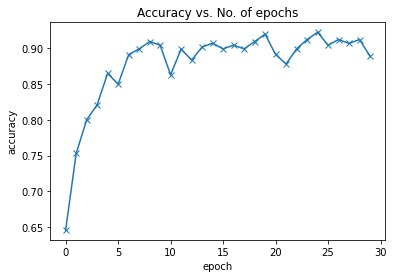

In [53]:
plot_accuracies(perform)

In [54]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

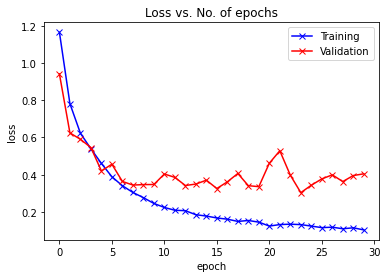

In [55]:
plot_losses(perform)